<a href="https://colab.research.google.com/github/Anderche/Natural-Language-Processing_Topic-Modeling/blob/main/Topic_Modeling_TM_Applied_to_Daily_News_Articles_24Apr2022_Anders_Kiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modeling (TM) Applied to Daily News Articles**

---

Anders Kiss



20-April-2022

---


# **Business Understanding**


**Use Cases**: 


- **Content Recommendations:**
  - TM can help recommend content to website visitors. Instead of relying on visitors filtering, TM can be combined with Recommendation Systems to personalize content for site visitors, placing the most relevant content on visitor's screen via a simple keyword matching approach for each visitor, later changing to a collaborative matching approach for groups of readers with similar interests. News outlets can use topic modeling in order to: identify topics in articles AND identify topic preferences amongst its readers, THEN compare the two to find the best match for a visitor.

- **Legal document searches:**
  - TM can save time/resources, and ensure that important information is identified.Document volume can be very large; 100% search is typically not viable; relevant facts may be overlooked TM can help "surface" information within documents even if not all are searched.


---

### The following project will model **Daily news articles** to quickly understand the main global themes of the day.

---

In [ ]:
!pip install newsapi-python

In [ ]:
# Register for an API Key at the following URL:
# https://newsapi.org/register
Api_key = 'ad3558ca3c824fddab060f3106abb5db'

# **Data Understanding**

In [ ]:
from newsapi import NewsApiClient
import pandas as pd

# Initialize the API client
newsapi = NewsApiClient(api_key='$ENTER_API_KEY_HERE')

pages = 6
df = pd.DataFrame()
for i in range(1,pages):
  top_headlines = newsapi.get_top_headlines(language='en',
                                          page = i)
  df = df.append(top_headlines['articles'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       100 non-null    object
 1   author       82 non-null     object
 2   title        100 non-null    object
 3   description  100 non-null    object
 4   url          100 non-null    object
 5   urlToImage   99 non-null     object
 6   publishedAt  100 non-null    object
 7   content      96 non-null     object
dtypes: object(8)
memory usage: 7.0+ KB


In [ ]:
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Daily Maverick'}",Catherine Tomlinson for Spotlight,Flucytosine in SA: What it means for cryptococ...,"After seemingly endless delays, a critically i...",https://www.dailymaverick.co.za/article/2022-0...,https://www.dailymaverick.co.za/wp-content/upl...,2022-04-20T12:39:36Z,Cryptococcal meningitis (CM) is one of the lea...
1,"{'id': None, 'name': 'NDTV News'}",Agence France-Presse,"Wimbledon Ban On Russian Players Would Be ""Una...",The Kremlin said Wednesday that banning Russia...,https://sports.ndtv.com/tennis/wimbledon-ban-o...,https://c.ndtvimg.com/2022-04/hsfhsnck_wimbled...,2022-04-20T12:30:40Z,The Kremlin said Wednesday that banning Russia...
2,"{'id': None, 'name': 'Telegraph.co.uk'}",None,Russia-Ukraine latest news: Captured British f...,The family of a British man captured fighting ...,https://www.telegraph.co.uk/world-news/2022/04...,https://www.telegraph.co.uk/content/dam/world-...,2022-04-20T12:27:17Z,Wearing a grey tracksuit with a sleeve rolled ...
3,"{'id': None, 'name': 'WGAL Susquehanna Valley ...",Anne Shannon,"Kreider Farms in Donegal, Lancaster County, de...",No new cases of avian flu have been reported t...,https://www.wgal.com/article/bird-flu-lancaste...,https://kubrick.htvapps.com/vidthumb/images/kr...,2022-04-20T12:27:00Z,No new cases of avian flu have been reported t...
4,"{'id': None, 'name': 'New York Times'}",Mike Ives,Arizona Wildfire Is Driven by High Winds - The...,"The Tunnel fire, near Flagstaff, prompted the ...",https://www.nytimes.com/2022/04/20/us/arizona-...,https://static01.nyt.com/images/2022/04/20/mul...,2022-04-20T12:23:41Z,The blaze was completely uncontained as of Tue...


# **Data Preparation**

In [ ]:
news_data = df[['title', 'description', 'content']]

In [ ]:
print('number of nan: ',news_data.isnull().sum())
news_data = news_data.dropna()
print('number of nan: ',news_data.isnull().sum())

number of nan:  title           0
description     0
content        10
dtype: int64
number of nan:  title          0
description    0
content        0
dtype: int64


In [ ]:
news_data['all_page'] = news_data[['title', 'description', 'content']].agg(' '.join, axis=1)

In [ ]:
import joblib
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string, unicodedata, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def tokenize(x):
  try:
    x = x.encode('ascii', 'ignore').decode() #'ascii')
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = ' '.join([word for word in x.split(' ') if word not in stopwords.words('english')])
    x = re.sub(r'[^\w\s]', '', str(x).lower().strip())
    return x #A, terms
  except Exception as e:
    print(e)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
news_data['clean_page'] = news_data.all_page.apply(tokenize)

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f94969a853e1e07e84da920866e70bcb6af96dcc6fa52e84eb2bb9699d0efa55
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import langdetect 

#for i in new_list:

news_data['lang'] = news_data['clean_page'].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
news_data[news_data.lang != 'en']

,title,description,content,all_page,clean_page,lang
5,Ex-CFO: KPMG said would sign off on 2013 audit...,"KUALA LUMPUR, April 20 — Audit firm KPMG was a...",Datuk Seri Najib Razak arrives at the Kuala Lu...,Ex-CFO: KPMG said would sign off on 2013 audit...,ex cfo kpmg said would sign 2013 audit pm naj...,id
6,Sony выпустила программу для обновления DualSe...,#sony #playstation #dualsense #новости,"Elden Ring , - , , , , . 1.04 Elden Ring , . .",Sony выпустила программу для обновления DualSe...,sony dualsense ps5 playstation d...,da


In [ ]:
news_data.drop(news_data.loc[news_data['lang']!='en'].index, inplace=True)

In [ ]:
news_data[news_data.lang != 'en']

,title,description,content,all_page,clean_page,lang


In [ ]:
print('number of nan: ',news_data.isnull().sum())

number of nan:  title          0
description    0
content        0
all_page       0
clean_page     0
lang           0
dtype: int64


In [ ]:
news_data.head()

,title,description,content,all_page,clean_page,lang
0,Russia-Ukraine latest news: Mariupol's final d...,The final Ukrainian fighters in the besieged p...,Wearing a grey tracksuit with a sleeve rolled ...,Russia-Ukraine latest news: Mariupol's final d...,russia ukraine latest news mariupol final def...,en
1,Updates - Two arrested in Birmingham after one...,Emergency services were called to the one-year...,A man and a woman have been arrested following...,Updates - Two arrested in Birmingham after one...,updates two arrested birmingham one year old...,en
2,Netflix turns to adverts as subscriber slump s...,"Netflix will roll out a cheaper, advertising-s...",Good morning. \r\nNetflix is tearing up all it...,Netflix turns to adverts as subscriber slump s...,netflix turns adverts subscriber slump sends s...,en
3,Jahangirpuri demolition drive Live Updates: No...,"Delhi Temperature Today, Jahangirpuri Violence...",The Ashram underpass is set to completely open...,Jahangirpuri demolition drive Live Updates: No...,jahangirpuri demolition drive live updates no...,en
7,B.C. poultry farmers uniquely equipped to resp...,VANCOUVER — Poultry farmers in British Columbi...,Author of the article:\r\nArticle content\r\nV...,B.C. poultry farmers uniquely equipped to resp...,b c poultry farmers uniquely equipped respond...,en


In [ ]:
news_data.iloc[0]['clean_page']

'russia ukraine latest news  mariupol final defenders facing  last hours   warns trapped fighter   the telegraph the final ukrainian fighters besieged port city mariupol could  quot facing last days  hours quot   ukrainian commander warned  wearing grey tracksuit sleeve rolled shoulder 71 year old vladimir lignov shuffles corridor refugee centre ukraine  revealingthe remains severed limb says h   611 chars'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
vectorizer = CountVectorizer(stop_words = 'english', max_df = 20)
A = vectorizer.fit_transform(news_data['clean_page'])
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )
terms =  list(vectorizer.get_feature_names_out())
print("Vocabulary has %d distinct terms" % len(terms))

Created 80 X 1898 document-term matrix
Vocabulary has 1898 distinct terms


In [ ]:
list(vectorizer.vocabulary_.items())[:2]

[('russia', 1485), ('ukraine', 1764)]

In [ ]:
joblib.dump((A,terms,news_data['clean_page']), "articles-raw.pkl") 

['articles-raw.pkl']

## **TF-IDF**

In [ ]:
import operator, joblib

def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
ranking = rank_terms(A, terms)
for i, pair in enumerate(ranking[0:20]):
    print( "%02d. %s (%.2f)" % (i+1, pair[0], pair[1] ))

01. news (19.00)
02. year (17.00)
03. live (16.00)
04. ukraine (14.00)
05. 000 (11.00)
06. netflix (11.00)
07. russia (11.00)
08. covid (10.00)
09. herald (10.00)
10. mariupol (10.00)
11. minister (10.00)
12. old (10.00)
13. star (10.00)
14. time (10.00)
15. updates (10.00)
16. world (10.00)
17. 20 (9.00)
18. 200 (9.00)
19. claims (9.00)
20. today (9.00)


In [ ]:
TF_IDF_Vect = TfidfVectorizer(stop_words='english',use_idf=True)
TF_X =  TF_IDF_Vect.fit_transform(news_data['clean_page'])
X_TF = TF_X.todense()
terms_X =  list(vectorizer.get_feature_names_out())
first_vector_tfidfvectorizer=X_TF[1] 
tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T, index=TF_IDF_Vect.get_feature_names(), columns=["tfidf"])
tfidf.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
old,0.282042
emergency,0.276482
boy,0.276482
called,0.276482
cardiac,0.276482
...,...
evening,0.000000
evacuati,0.000000
ev,0.000000
ethekwini,0.000000


In [ ]:
joblib.dump((TF_X,terms_X,news_data['clean_page']), "articles-tfidf.pkl") 


['articles-tfidf.pkl']

In [ ]:
(A, terms, snippets) = joblib.load("articles-tfidf.pkl")
print("Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]))

Loaded 80 X 1900 document-term matrix


# **Modeling**

# **APPLY NMF**

## Non-negative Matrix Factorisation (NMF)

### Matrix Factorisation approach applies methods from linear algebra to decompose a document-term matrix into a set of smaller matrices

NMF can be applied for topic modeling, where the input is a document-term matrix, typically TF-IDF normalised.

**Input**: Document-term matrix A; Number of topics k

**Output**: Two k-dimensional factors W and H approximating A

In [ ]:
import joblib
import numpy as np
from sklearn import decomposition
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# settings for our plots later
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [ ]:
# The number of topics to generate, k (input parameter to NMF)
k = 10

In [ ]:
# CREATE model
# specify initialization & number of topics to produce
model = decomposition.NMF(init="nndsvd", n_components=k) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
# CHECK output matrix
W.shape

(80, 10)

In [ ]:
# For instance, for the first article, we see that it is strongly associated
# with one topic. However, each article can be potentially associated 
# with multiple topics to different degrees.

# Display with two decimals
W[0,:].round(2)

array([0.  , 0.  , 0.  , 0.6 , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ])

In [ ]:
# The H factor contains the term weights relative to each of the k topics. 
# Here rows correspond to a topic, and each column corresponds to a unique 
# term in the corpus vocabulary

H.shape

(10, 1900)

In [ ]:
term_index = terms.index('russia')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  ])

# **Evaluation**

### **Topic Descriptors**

In [ ]:
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [ ]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: news, zen, heraldthe, low, possible, impres, hereditary, obtain, mirror, enforcement
Topic 02: nethe, subsidia, lot, 200, 000, striker, subscribersthe, millions, giving, gst
Topic 03: social, wow, outfitted, drops, showdown, invest, feature, inhaled, female, 11
Topic 04: market, ukraineshelling, ultimae, russians, civilians, commands, forecast, besieged, russias, warned
Topic 05: 20, number, newshub, 2022, breaking, pro, ministry, premium, morrisons, dominics
Topic 06: yesterday, omicron, deaths, fans, birmingham, ponga, arrested, food, empires, cardiac
Topic 07: seen, issues, son, falana, chris, pain, natural, dela, solomon, canberra
Topic 08: liverpool, detention, olaitan, healthcare, diseases, china, mystery, worst, previous, ramsay
Topic 09: buhari, press, multi, kwekut, bishop, spark, adesina, censured, women, dark
Topic 10: rules, headaches, wrangling, crores, delivery, indonesia, working, problems, capital, urged


In [ ]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

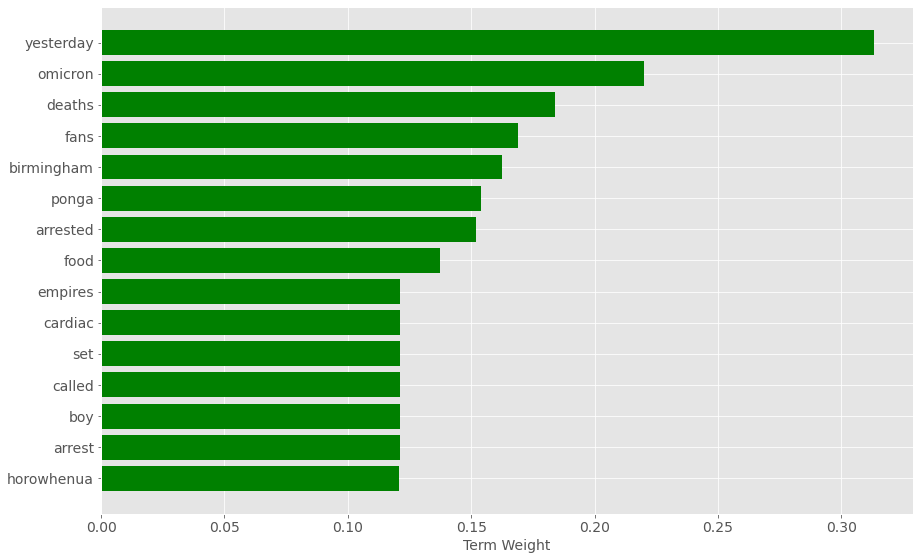

In [ ]:
plot_top_term_weights(terms, H, 5, 15)

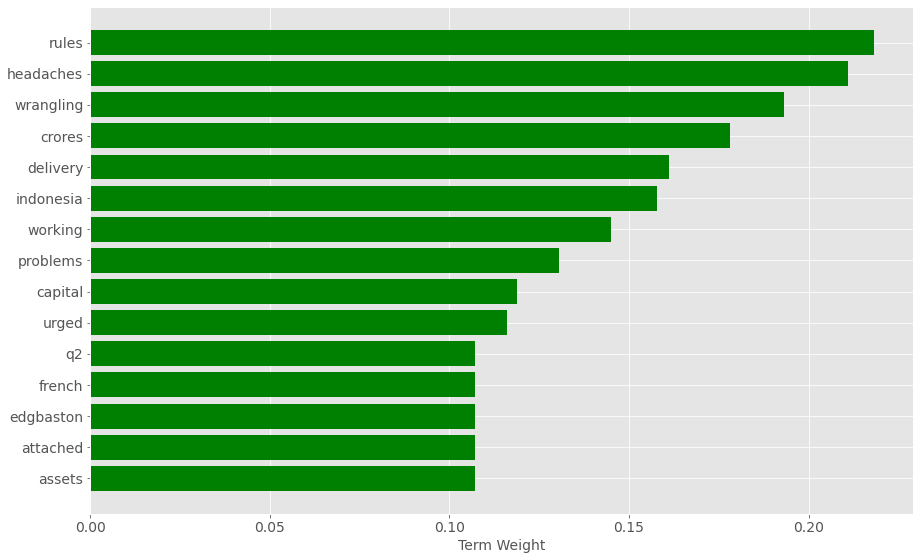

In [ ]:
plot_top_term_weights(terms, H, 9, 15)


## **Most Relevant Documents**

In [ ]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append(all_snippets.iloc[doc_index] )
    return top_snippets

In [ ]:
snippets.iloc[0]

'russia ukraine latest news  mariupol final defenders facing  last hours   warns trapped fighter   the telegraph the final ukrainian fighters besieged port city mariupol could  quot facing last days  hours quot   ukrainian commander warned  wearing grey tracksuit sleeve rolled shoulder 71 year old vladimir lignov shuffles corridor refugee centre ukraine  revealingthe remains severed limb says h   611 chars'

In [ ]:
topic_snippets = get_top_snippets(snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. 13 deaths  11217 new covid cases delayed ministry announcement   new zealand herald omicron cases hospitalisations declining recent weeks  why miq couldve ended lot earlier  calls inquiry new zealands ports sanctions imposed russia latest new zealand herald headlines  video   nz heraldthe ministry healt   4963 chars
02. further court action expected lisa lewis stoush neighbour   new zealand herald it understood hamilton cosmopolitan club appealing case  why miq couldve ended lot earlier  calls inquiry new zealands ports sanctions imposed russia latest new zealand herald headlines  video   nz heraldthe landlord ad   2420 chars
03. police incident unfolding near shannon   new zealand herald police officers scene near state highway 57  one person taken hospital serious injuries following incident horowhenua town shannon 
 a man transported palmerston north hospital serious injuries fo   472 chars
04. worker suffered severe headaches awarded  17 000 losing job   new zealand herald work

Similarly, for the second topic:

In [ ]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. netflix lost customers first time decade  considers cheaper tier ads   gsmarena com news   gsmarena com the company expected add 2 5 million subscribers actually lost 200 000 q1  netflix posted quarterly report yesterday  numbers january march looked uninspiring  the streaming company expected add 2 5 million subscribers  instead  lost 200 000 th   1577 chars
02. netflix turns adverts subscriber slump sends shares crashing   live updates   the telegraph netflix roll cheaper  advertising supported version streaming platform left reeling first subscriber loss decade  good morning 
netflix tearing old rules disastrous set quarterly results cast doubts future prospects 
the streaming giant said lost 200 000 subscribers   2084 chars
03. elon musk   woke mind virus is making netflix unwatchable    the daily beast the worlds richest man weighed predictably troll like fashion  the big news tuesday concerned netflix  whose disappointing first quarter earnings report revealed streaming giant

# **Deployment**

### **Exporting the Results**

The following model could be integrated into the website of a news outlet/newspaper. Specifically, the topics surfaced for each day could be integrated with a Knowledge-based Recommender System in order to reveal different stories on the homepage of different users, based on a user's previous search history.

In [ ]:
joblib.dump((W,H,terms,snippets), "articles-model-nmf-k%02d.pkl" % k) 


['articles-model-nmf-k10.pkl']